In [1]:
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Initialize image data gene

In [2]:
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [3]:
train_generator = train_data_gen.flow_from_directory(
        'fer2013/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [4]:

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        'fer2013/validation',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 3589 images belonging to 7 classes.


In [5]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

In [7]:

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))


In [11]:
emotion_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           7,175 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,036,823 (26.84 MB)

 Trainable params: 2,345,607 (8.95 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,691,216 (17.90 MB)

In [8]:
cv2.ocl.setUseOpenCL(False)
emotion_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001, decay=1e-6),
    metrics=['accuracy']
)

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [9]:
# Train the neural network/model
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=70,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

Epoch 1/70


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 433s 952ms/step - accuracy: 0.2486 - loss: 1.8317 - val_accuracy: 0.3062 - val_loss: 1.7411
Epoch 2/70


C:\Users\DELL\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.3750 - loss: 1.7517 - val_accuracy: 0.3121 - val_loss: 1.7367
Epoch 3/70
448/448 ━━━━━━━━━━━━━━━━━━━━ 335s 745ms/step - accuracy: 0.3476 - loss: 1.6580 - val_accuracy: 0.3681 - val_loss: 1.6099
Epoch 4/70
448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.2969 - loss: 1.7305 - val_accuracy: 0.3711 - val_loss: 1.6101
Epoch 5/70
448/448 ━━━━━━━━━━━━━━━━━━━━ 202s 448ms/step - accuracy: 0.4089 - loss: 1.5405 - val_accuracy: 0.3993 - val_loss: 1.5648
Epoch 6/70
448/448 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.3750 - loss: 1.4780 - val_accuracy: 0.3993 - val_loss: 1.5679
Epoch 7/70
448/448 ━━━━━━━━━━━━━━━━━━━━ 195s 428ms/step - accuracy: 0.4422 - loss: 1.4602 - val_accuracy: 0.4160 - val_loss: 1.5252
Epoch 8/70
448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5469 - loss: 1.2517 - val_accuracy: 0.4182 - val_loss: 1.5268
Epoch 9/70
448/448 ━━━━━━━━━━━━━━━━━━━━ 120s 266ms/step - accuracy: 0.4608 - loss: 1.4105 - val_accur

Epoch 52/70
448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6719 - loss: 0.8882 - val_accuracy: 0.5347 - val_loss: 1.4752
Epoch 53/70
448/448 ━━━━━━━━━━━━━━━━━━━━ 123s 274ms/step - accuracy: 0.7129 - loss: 0.7921 - val_accuracy: 0.5492 - val_loss: 1.4927
Epoch 54/70
448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7500 - loss: 0.8781 - val_accuracy: 0.5458 - val_loss: 1.4894
Epoch 55/70
448/448 ━━━━━━━━━━━━━━━━━━━━ 174s 388ms/step - accuracy: 0.7167 - loss: 0.7678 - val_accuracy: 0.5397 - val_loss: 1.5116
Epoch 56/70
448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5625 - loss: 0.9888 - val_accuracy: 0.5391 - val_loss: 1.5053
Epoch 57/70
448/448 ━━━━━━━━━━━━━━━━━━━━ 113s 252ms/step - accuracy: 0.7302 - loss: 0.7445 - val_accuracy: 0.5433 - val_loss: 1.5069
Epoch 58/70
448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7812 - loss: 0.5946 - val_accuracy: 0.5433 - val_loss: 1.5121
Epoch 59/70
448/448 ━━━━━━━━━━━━━━━━━━━━ 110s 246ms/step - accuracy: 0.7451 - loss: 0

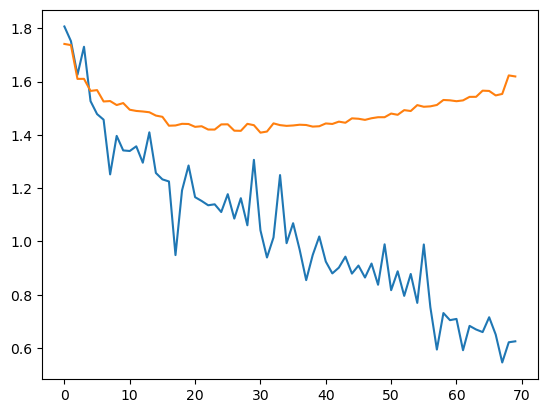

In [13]:
import matplotlib.pyplot as plt

plt.plot(emotion_model_info.history['loss'])
plt.plot(emotion_model_info.history['val_loss'])

In [14]:
# Save model structure to a JSON file
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

# Save trained model weights to a .weights.h5 file
emotion_model.save_weights('emotion_model.weights.h5')


In [1]:
import cv2
import numpy as np
from keras.models import model_from_json

# Emotion dictionary corresponding to the output labels
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# Load model architecture from JSON file
with open('emotion_model.json', 'r') as json_file:
    loaded_model_json = json_file.read()

# Create model from JSON
emotion_model = model_from_json(loaded_model_json)

# Load weights into the model from a .h5 file
emotion_model.load_weights("emotion_model.weights.h5")  # Ensure this path is correct
print("Loaded model from disk")

# Start the video capture (either webcam or video file)
# cap = cv2.VideoCapture("C:\\JustDoIt\\ML\\Sample_videos\\emotion_sample6.mp4")
cap = cv2.VideoCapture(0)
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break
    
    # Resize frame for consistency
    frame = cv2.resize(frame, (1280, 720))
    
    # Convert to grayscale for face detection
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Load the face detection model (ensure path is correct)
    face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    
    # Detect faces
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)
    
    # Process each face found in the frame
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # Predict the emotionq
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    # Display the resulting frame
    cv2.imshow('Emotion Detection', frame)
    
    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture and close windows
cap.release()
cv2.destroyAllWindows()


Loaded model from disk
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

In [ ]:
import cv2
import numpy as np
from keras.models import model_from_json

# Emotion dictionary corresponding to the output labels
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# Load model architecture from JSON file
with open('emotion_model.json', 'r') as json_file:
    loaded_model_json = json_file.read()

# Create model from JSON
emotion_model = model_from_json(loaded_model_json)

# Load weights into the model from a .h5 file
emotion_model.load_weights("emotion_model.weights.h5")  # Ensure this path is correct
print("Loaded model from disk")

# Load the image
image_path = "emotions_crop.jpg"  # Replace with your image path
image = cv2.imread(image_path)

# Resize image for consistency
image = cv2.resize(image, (1280, 720))

# Convert to grayscale for face detection
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load the face detection model (ensure path is correct)
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Detect faces
num_faces = face_detector.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

# Process each face found in the image
for (x, y, w, h) in num_faces:
    cv2.rectangle(image, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
    roi_gray_image = gray_image[y:y + h, x:x + w]
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_image, (48, 48)), -1), 0)

    # Predict the emotion
    emotion_prediction = emotion_model.predict(cropped_img)
    maxindex = int(np.argmax(emotion_prediction))
    cv2.putText(image, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

# Display the resulting image
cv2.imshow('Emotion Detection', image)

# Wait until any key is pressed and then close the window
cv2.waitKey(0)
cv2.destroyAllWindows()


Loaded model from disk
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
